# 分类

SVC, NuSVC, LinearSVC

## 示例：绘制最大分隔距离平面

In [7]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

In [26]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

In [27]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

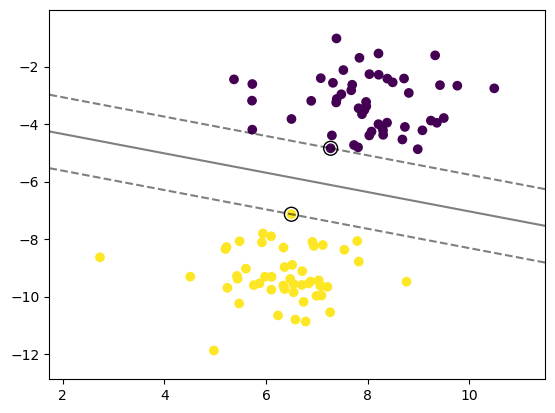

In [28]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
DecisionBoundaryDisplay.from_estimator(
    estimator=clf,
    X=X,
    plot_method='contour',
    ax = ax,
    colors = 'k',
    levels = [-1, 0, 1],
    alpha=0.5,
    linestyles = ['--', '-', '--']
)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],   
    s=100,
    linewidth = 1,
    edgecolors = 'k',
    facecolors = 'none'
)

## 示例:iris分类在几种核函数的表现
- Linear核：不进行任何非线性映射；分界面是超平面；$ k(x, x') = x^\top x'$
- RBF径向基核：映射到无穷维空间, 非线性关系；每个样本周围产生气泡，组合形成曲面；$ k(x, x') = \exp(-\gamma|x - x'|^2)$
- Polynomial多项式核: 原特征组合成高阶，高维空间的非线性映射；非平面

In [44]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

In [35]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

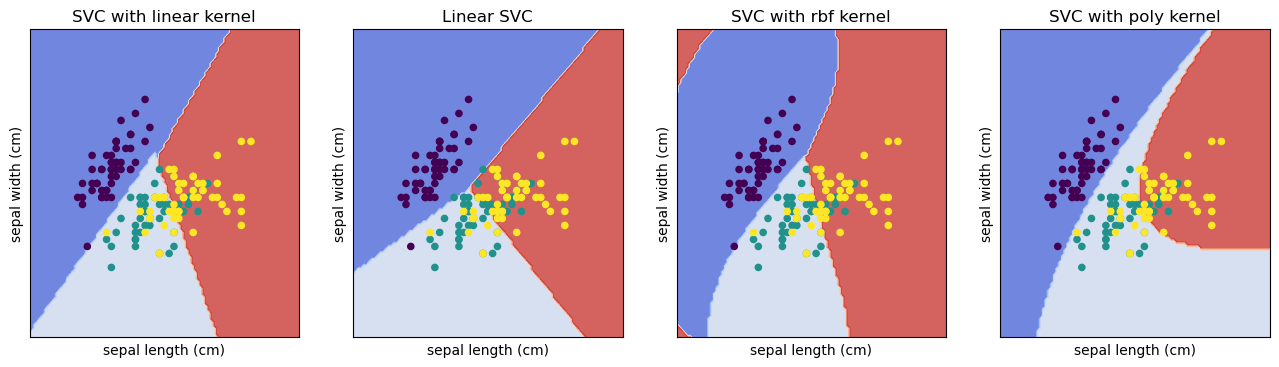

In [50]:
C=1.0 # svm 正则化参数
models = (
    svm.SVC(kernel='linear', C=C),
    svm.LinearSVC(C=C, max_iter=1000),
    svm.SVC(kernel='rbf', gamma=0.6, C=C),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
)
models = ( model.fit(X, y) for model in models)
titles = (
    'SVC with linear kernel',
    'Linear SVC',
    'SVC with rbf kernel',
    'SVC with poly kernel'
)
fig, axes = plt.subplots(1, 4, figsize = (16, 4))
for ax, clf, title in zip(axes, models, titles):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method='predict',
        ax = ax,
        cmap = colormaps.get_cmap('coolwarm'),
        alpha = 0.8,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1]
    )
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)

## 示例：类别样本不平衡时候,超平面位置倾向问题

In [2]:
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [3]:
X, y = make_blobs(
    n_features=2,
    n_samples=[1000, 100],
    centers=[[0,0], [2,2]],
    cluster_std=[1.5, 2.0],
    random_state=0,
    shuffle=False
)

In [4]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

C:\Users\dong\AppData\Local\Temp\ipykernel_28868\2251433140.py:11: UserWarning: Legend does not support handles for DecisionBoundaryDisplay instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(


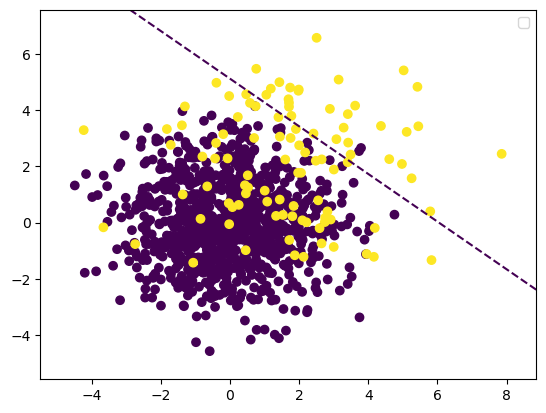

In [14]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method='contour',
    ax = ax,
    levels = [0],
    linestyles=['--'],
)
ax.legend(
    handles = [
        []
    ],
    labels = ['non-weighted'],
    loc = 'upper right'
)